# AI305 - Multilayer Perceptron



The purpose of this lab is to implement multilayer perceptron or fully-connected neural networks (FCNNs) using the MLP implementation from *scikit-learn* 

We will work on MNIST datast. 

### Multilayer perceptron for classification 

*Use the neural network implementation from scikit-learn, i.e. MLPClassifier, to build a classifier to recognize all ten digits in the MNIST data set. Investigate the best architecture for the fully connected neural networks (i.e., number of hidden layers and number of hidden nodes per layer) for this task, and fine-tune all hyper-parameters in the SGD optimizer towards the best possible performance.*
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict

In [1]:
# install python_mnist
!pip install python_mnist

In [2]:
#load MINST images

from mnist import MNIST
import numpy as np

mnist_loader = MNIST('')
train_data, train_label = mnist_loader.load_training()
test_data, test_label = mnist_loader.load_testing()
X_train = np.array(train_data, dtype='float')/255.0 # norm to [0,1]
y_train = np.array(train_label, dtype='short')
X_test = np.array(test_data, dtype='float')/255.0 # norm to [0,1]
y_test = np.array(test_label, dtype='short')


# convert MNIST training labels into 10-D one-hot vectors 
Y_train = np.zeros((y_train.size, y_train.max()+1))
Y_train[np.arange(y_train.size),y_train] = 1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, Y_train.shape)

(60000, 784) (60000,) (10000, 784) (10000,) (60000, 10)


In [3]:
# build 10-digit classifer using MLPClassifier from scikit-learn

from sklearn.neural_network import MLPClassifier

# here are all hyper-parameters for MLPClassifier
#
mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500,250,100), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=20, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

mlp.fit(X_train, y_train)

print(f"Training set score: {mlp.score(X_train, y_train):.3f}")

Iteration 1, loss = 0.25828809
Iteration 2, loss = 0.08666144
Iteration 3, loss = 0.05555631
Iteration 4, loss = 0.04099409
Iteration 5, loss = 0.03231283
Iteration 6, loss = 0.02398454
Iteration 7, loss = 0.01929084
Iteration 8, loss = 0.01741954
Iteration 9, loss = 0.01556434
Iteration 10, loss = 0.00976176
Iteration 11, loss = 0.00997135
Iteration 12, loss = 0.00679177
Iteration 13, loss = 0.00777384
Iteration 14, loss = 0.00933750
Iteration 15, loss = 0.00539144
Iteration 16, loss = 0.00488355
Iteration 17, loss = 0.00428039
Iteration 18, loss = 0.00948719
Iteration 19, loss = 0.00865621
Iteration 20, loss = 0.00993937
Training set score: 0.998


C:\Users\4311779\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Return the mean accuracy on the given test data and labels

In [4]:
print(f"Test set score: {mlp.score(X_test, y_test):.3f}")

Test set score: 0.981


Visulaize an image

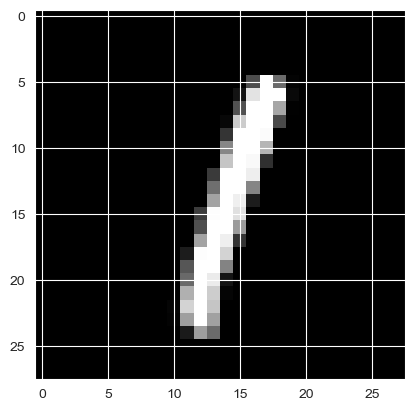

In [5]:
import matplotlib.pyplot as plt
pixels = np.array(X_test[5,:], dtype='float')
pixels = pixels.reshape((28, 28))
#plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

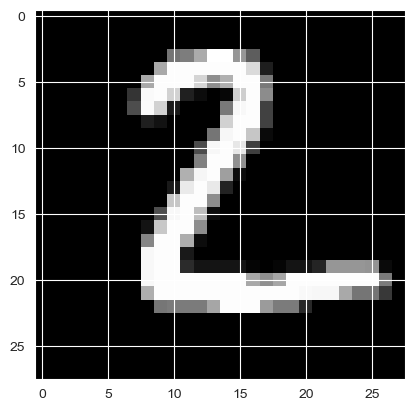

In [6]:
import matplotlib.pyplot as plt
image= X_test[1:2,:]
pixels = np.array(image, dtype='float')
pixels = pixels.reshape((28, 28))
#plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()


In [7]:
mlp.predict(X_test[1:2,:])

array([2], dtype=int16)

## Activity

1. Install cifar10 and cifar100 datasets and build appropriate MLP models for them, showing the accuracy and confusion matrices.
2. explain the results of the previous activity.
2. Investigate applying multilayer preceptron on regression by building a regression model on a regression dataset from the previous labs or any suitable dataset you suggest. 

In [10]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 610.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 4.5 MB/s eta 0:01:26
   ---------------------------------------- 0.2/385.2 MB 2.5 MB/s eta 0:02:34
   ---------------------------------------- 0.4/385.2 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.4/385.2 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.6/385.2 MB 3.1 MB/s eta 0:02:03
   ---------------------------------------- 0.9/385.2 MB 3.0 MB/s eta 0:02:08
   ---------------------------------------- 0.9/385.2 MB 3.1 MB/s eta 0:02:03
   ---------------------------------------- 0.9/385.2 MB 2.4 MB/s eta 0:02:42
   ---------------------------------------- 1.3/385.2 MB 3.3 MB/s eta 0:0

In [12]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(train_data, train_label), (test_data, test_label) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 518s 3us/step


In [16]:
X_train = np.array(train_data, dtype='float') / 255.0  # Normalize to [0,1]
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D (50000, 3072)

y_train = np.array(train_label, dtype='short').reshape(-1)  # Convert to 1D array
X_test = np.array(test_data, dtype='float') / 255.0    # Normalize to [0,1]
X_test = X_test.reshape(X_test.shape[0], -1)          # Flatten to 2D (10000, 3072)

y_test = np.array(test_label, dtype='short').reshape(-1)  # Convert to 1D array

In [17]:
Y_train = np.zeros((y_train.size, y_train.max()+1))
Y_train[np.arange(y_train.size),y_train] = 1


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, Y_train.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,) (50000, 10)


In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
                beta_2=0.999, early_stopping=False, epsilon=1e-08,
                hidden_layer_sizes=(500,250,100), learning_rate='constant',
                learning_rate_init=0.1, max_fun=15000, max_iter=20, momentum=0.9,
                n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                random_state=1, shuffle=True, solver='sgd', tol=0.0001,
                validation_fraction=0.1, verbose=10, warm_start=False)

mlp.fit(X_train, y_train)

print(f"Training set score: {mlp.score(X_train, y_train):.3f}")

Iteration 1, loss = 2.09401784
Iteration 2, loss = 1.93204206
Iteration 3, loss = 1.82063516
Iteration 4, loss = 1.77543666
Iteration 5, loss = 1.71781997
Iteration 6, loss = 1.67264829
Iteration 7, loss = 1.63940026
Iteration 8, loss = 1.60615729
Iteration 9, loss = 1.59251004
Iteration 10, loss = 1.56161404
Iteration 11, loss = 1.55233105
Iteration 12, loss = 1.53208236
Iteration 13, loss = 1.51678824
Iteration 14, loss = 1.50879292
Iteration 15, loss = 1.49901979
Iteration 16, loss = 1.47947461
Iteration 17, loss = 1.47485107
Iteration 18, loss = 1.46177172
Iteration 19, loss = 1.45537219
Iteration 20, loss = 1.44196114


C:\Users\4311779\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.490


In [20]:
print(f"Test set score: {mlp.score(X_test, y_test):.3f}")

Test set score: 0.448


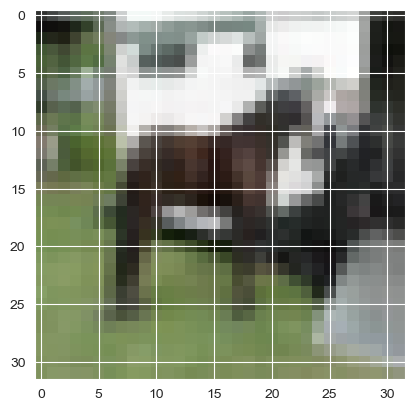

In [29]:
import matplotlib.pyplot as plt
pixels = np.array(X_test[20,:], dtype='float')
pixels = pixels.reshape((32, 32, 3))
plt.imshow(pixels, cmap='gray')
plt.show()

In [30]:
mlp.predict(X_test[20:21,:])

array([4], dtype=int16)